V.1: Exploring the green reds

a)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

In [57]:
data = pd.read_csv("input/winequality-red.csv")
data.shape

(1599, 12)

In [58]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [60]:
data.shape

(1599, 12)

In [61]:
def plot_scatter_matrix(data, good_threshold, bad_threshold):
    
#     #take out the quality column
#     good_data = good_data.drop('quality', 1)
#     bad_data = bad_data.drop('quality', 1)

    names = data.columns
    good_data = data.loc[data['quality'] >= good_threshold]
    bad_data = data.loc[data['quality'] <= bad_threshold]

    
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numdata, ncols=numdata, figsize=(20,20))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    
    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

    # Plot the data.
    for i in range(0, numdata):
        for j in range(0, numdata):
            if (i != j):
                for x, y in [(i,j), (j,i)]:
                    #iloc allows me to grab by index so when I'm plotting it just uses the column index and plots them.
                    axes[x,y].plot(bad_data.iloc[:, y], bad_data.iloc[:, x], linestyle='none', marker='.', color='red', mfc='none')
                    axes[x,y].plot(good_data.iloc[:, y], good_data.iloc[:, x], linestyle='none', marker='.', color='green', mfc='none')

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    return fig


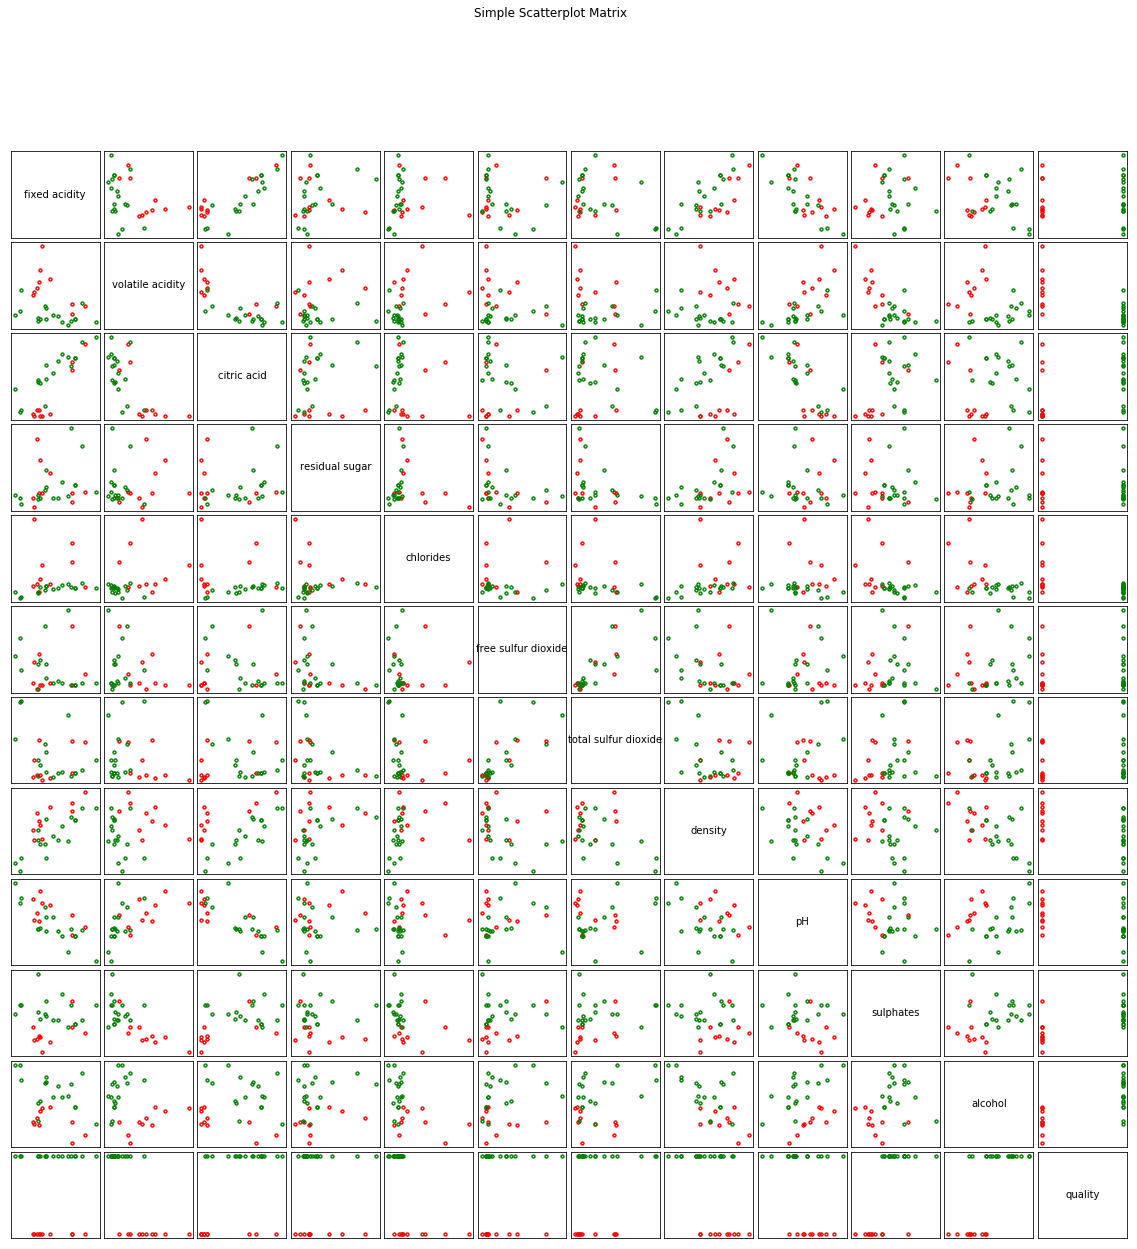

In [62]:
good_threshold = 8  
bad_threshold = 3

fig = plot_scatter_matrix(data,good_threshold,bad_threshold)
fig.suptitle('Simple Scatterplot Matrix')
plt.show()

b) Observations:
 1-Dimensional Analysis
 
    
    1) Lower volatile acidity trended to higher quality
    2) Low chlorides led trended to higher quality
    3) Higher alcohol content trended to higher quality
    4) Higher sulphates trended to higher quality
    5) Lower density trended to higher quality
    6) Lower pH trended to higher quality
    7) Most low quality wines had low citric acid
    8) Lower Sulfer dioxide trended to lower quality
 
 2-Dimensional Analysis
    * plots with greater separation between green and red show that these two factors have a relationship to quality 
    * poolings of green or red are also good indicators to relationship of quality
    
    1) Higher alcohol content with low volatile acidity led to higher ratings
    2) Lower Density and higher citric acid showed a trended to higher ratings
    3) High citric acid and low chlorides showed higher ratings
    
I think that volatile acidity, chlorids, sulphates, and alcohol content will be the most useful factors in deciding quality of wine because of the severity of their grouping and large disparity between high and low wines.
    

V.2 Learning to Perceptron

a) Implement a perceptron that:
    
       * Has randomly initialized weights and bias
       * Uses the Rosenblatt perceptron learning rule (with changeable learning rate)
       * Utilizes the heaviside step activation function (discrete version)

Predictions

Formula for activation function:
    * activation = (weight(0) * X(0)) + (weight(n) * x(n)) + bias

Heaviside step activation function:
    * if activation is > 1 then it predicts 1 if else returns 0.
    * simple binary classification

In [63]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        #iterate through inputs and multiply them to corresponding weights
        activation += weights[i + 1] * row[i]
        
    #use a transfer function to change value to 1 or 0.
    return 1.0 if activation >= 0.0 else 0.0

Training

There are 3 loops we need to perform in the function:

    1) Loop over each epoch.
    2) Loop over each row in the training data per epoch.
    3) Loop over each weight per feature in row.

In [65]:
# Estimate Perceptron weights using stochastic gradient descent

#The perceptron learning rule basically just adds the actual value 
def train_weights(train, l_rate, n_epoch):
    performance = []

    #random weights
    weights = [random.uniform(0, 1) for i in range(len(train[0]))]
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += abs(error)
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row) - 1):
                if (error > 0):
                    weights[i + 1] = weights[i + 1] + (l_rate * row[i])
                elif (error < 0):
                    weights[i + 1] = weights[i + 1] - (l_rate * row[i])
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        performance.append((epoch, sum_error, weights[1:], weights[0]))
    if n_epoch <= 0:
        epoch = 0
        sum_error = 1.0
        while sum_error != 0:
            sum_error = 0.0
            for row in train:
                prediction = predict(row, weights)
                error = row[-1] - prediction
                sum_error += abs(error)
                weights[0] = weights[0] + l_rate * error
                for i in range(len(row) - 1):
                    if (error > 0):
                        weights[i + 1] = weights[i + 1] + (l_rate * row[i])
                    elif (error < 0):
                        weights[i + 1] = weights[i + 1] - (l_rate * row[i])
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))            
            performance.append((epoch, sum_error, weights[1:], weights[0]))
            epoch += 1 
    print(weights)
    return performance

In [66]:
def dataframe_to_list(data):
        #convert to list
        return data.values.tolist()

In [71]:
def parse_dataframe(data, good_threshold, bad_threshold, columns, set_range=False):
    new_data = data.copy()

    if (set_range==False):
        #Covert all labels to 1 or 0 with threshold of good and bad
        new_data['good_bad'] = [1 if x >= good_threshold else 0 for x in new_data['quality']]
    else:
        #Covert all labels to 1 or -1 with threshold of good and bad
        new_data['good_bad'] = [1 if x >= good_threshold else -1 for x in new_data['quality']]
    
    #Grab all data higher than 8 or lower than 3 in quality.
    new_data = new_data.loc[(data['quality'] >= good_threshold) | (data['quality'] <= bad_threshold)]
    
    #Grab only the specified columns
    new_data = new_data.loc[:, columns]
    
    new_data = new_data.reset_index(drop=True)
    return(new_data)


In [73]:
test_train = parse_dataframe(data, good_threshold=8, bad_threshold=3, columns=['pH', 'alcohol', 'good_bad'])
test_train = dataframe_to_list(test_train)
test_train

[[3.35, 12.8, 1.0],
 [3.23, 12.6, 1.0],
 [3.56, 12.9, 1.0],
 [2.88, 9.8, 1.0],
 [3.22, 13.4, 1.0],
 [3.25, 9.0, 0.0],
 [3.15, 11.7, 1.0],
 [3.15, 11.0, 1.0],
 [3.15, 11.0, 1.0],
 [3.16, 8.4, 0.0],
 [3.72, 14.0, 1.0],
 [3.63, 10.7, 0.0],
 [3.46, 12.7, 1.0],
 [3.38, 9.9, 0.0],
 [3.48, 11.0, 0.0],
 [3.21, 12.5, 1.0],
 [2.98, 11.8, 1.0],
 [3.2, 13.1, 1.0],
 [3.35, 11.7, 1.0],
 [3.5, 14.0, 1.0],
 [3.5, 10.9, 0.0],
 [3.32, 9.8, 0.0],
 [3.23, 10.0, 1.0],
 [3.23, 11.3, 1.0],
 [3.31, 9.7, 0.0],
 [3.4, 10.2, 0.0],
 [3.55, 9.95, 0.0],
 [3.24, 11.4, 1.0]]

In [74]:
performance = train_weights(test_train, l_rate=5, n_epoch=0)

>epoch=0, lrate=5.000, error=13.000
>epoch=1, lrate=5.000, error=13.000
>epoch=2, lrate=5.000, error=11.000
>epoch=3, lrate=5.000, error=11.000
>epoch=4, lrate=5.000, error=11.000
>epoch=5, lrate=5.000, error=13.000
>epoch=6, lrate=5.000, error=11.000
>epoch=7, lrate=5.000, error=9.000
>epoch=8, lrate=5.000, error=2.000
>epoch=9, lrate=5.000, error=6.000
>epoch=10, lrate=5.000, error=13.000
>epoch=11, lrate=5.000, error=7.000
>epoch=12, lrate=5.000, error=4.000
>epoch=13, lrate=5.000, error=6.000
>epoch=14, lrate=5.000, error=9.000
>epoch=15, lrate=5.000, error=2.000
>epoch=16, lrate=5.000, error=2.000
>epoch=17, lrate=5.000, error=4.000
>epoch=18, lrate=5.000, error=6.000
>epoch=19, lrate=5.000, error=8.000
>epoch=20, lrate=5.000, error=9.000
>epoch=21, lrate=5.000, error=8.000
>epoch=22, lrate=5.000, error=7.000
>epoch=23, lrate=5.000, error=6.000
>epoch=24, lrate=5.000, error=8.000
>epoch=25, lrate=5.000, error=7.000
>epoch=26, lrate=5.000, error=4.000
>epoch=27, lrate=5.000, error=

>epoch=1254, lrate=5.000, error=2.000
>epoch=1255, lrate=5.000, error=2.000
>epoch=1256, lrate=5.000, error=2.000
>epoch=1257, lrate=5.000, error=2.000
>epoch=1258, lrate=5.000, error=1.000
>epoch=1259, lrate=5.000, error=2.000
>epoch=1260, lrate=5.000, error=2.000
>epoch=1261, lrate=5.000, error=2.000
>epoch=1262, lrate=5.000, error=2.000
>epoch=1263, lrate=5.000, error=2.000
>epoch=1264, lrate=5.000, error=2.000
>epoch=1265, lrate=5.000, error=2.000
>epoch=1266, lrate=5.000, error=2.000
>epoch=1267, lrate=5.000, error=2.000
>epoch=1268, lrate=5.000, error=2.000
>epoch=1269, lrate=5.000, error=2.000
>epoch=1270, lrate=5.000, error=2.000
>epoch=1271, lrate=5.000, error=2.000
>epoch=1272, lrate=5.000, error=2.000
>epoch=1273, lrate=5.000, error=2.000
>epoch=1274, lrate=5.000, error=2.000
>epoch=1275, lrate=5.000, error=2.000
>epoch=1276, lrate=5.000, error=2.000
>epoch=1277, lrate=5.000, error=2.000
>epoch=1278, lrate=5.000, error=2.000
>epoch=1279, lrate=5.000, error=2.000
>epoch=1280,

>epoch=2253, lrate=5.000, error=2.000
>epoch=2254, lrate=5.000, error=2.000
>epoch=2255, lrate=5.000, error=2.000
>epoch=2256, lrate=5.000, error=2.000
>epoch=2257, lrate=5.000, error=2.000
>epoch=2258, lrate=5.000, error=2.000
>epoch=2259, lrate=5.000, error=2.000
>epoch=2260, lrate=5.000, error=2.000
>epoch=2261, lrate=5.000, error=2.000
>epoch=2262, lrate=5.000, error=2.000
>epoch=2263, lrate=5.000, error=2.000
>epoch=2264, lrate=5.000, error=2.000
>epoch=2265, lrate=5.000, error=2.000
>epoch=2266, lrate=5.000, error=2.000
>epoch=2267, lrate=5.000, error=2.000
>epoch=2268, lrate=5.000, error=2.000
>epoch=2269, lrate=5.000, error=2.000
>epoch=2270, lrate=5.000, error=1.000
>epoch=2271, lrate=5.000, error=2.000
>epoch=2272, lrate=5.000, error=2.000
>epoch=2273, lrate=5.000, error=2.000
>epoch=2274, lrate=5.000, error=2.000
>epoch=2275, lrate=5.000, error=2.000
>epoch=2276, lrate=5.000, error=2.000
>epoch=2277, lrate=5.000, error=2.000
>epoch=2278, lrate=5.000, error=2.000
>epoch=2279,

>epoch=3253, lrate=5.000, error=2.000
>epoch=3254, lrate=5.000, error=2.000
>epoch=3255, lrate=5.000, error=2.000
>epoch=3256, lrate=5.000, error=2.000
>epoch=3257, lrate=5.000, error=2.000
>epoch=3258, lrate=5.000, error=1.000
>epoch=3259, lrate=5.000, error=2.000
>epoch=3260, lrate=5.000, error=2.000
>epoch=3261, lrate=5.000, error=2.000
>epoch=3262, lrate=5.000, error=2.000
>epoch=3263, lrate=5.000, error=2.000
>epoch=3264, lrate=5.000, error=2.000
>epoch=3265, lrate=5.000, error=2.000
>epoch=3266, lrate=5.000, error=2.000
>epoch=3267, lrate=5.000, error=2.000
>epoch=3268, lrate=5.000, error=2.000
>epoch=3269, lrate=5.000, error=2.000
>epoch=3270, lrate=5.000, error=2.000
>epoch=3271, lrate=5.000, error=2.000
>epoch=3272, lrate=5.000, error=2.000
>epoch=3273, lrate=5.000, error=2.000
>epoch=3274, lrate=5.000, error=2.000
>epoch=3275, lrate=5.000, error=2.000
>epoch=3276, lrate=5.000, error=2.000
>epoch=3277, lrate=5.000, error=1.000
>epoch=3278, lrate=5.000, error=2.000
>epoch=3279,

>epoch=4252, lrate=5.000, error=2.000
>epoch=4253, lrate=5.000, error=1.000
>epoch=4254, lrate=5.000, error=2.000
>epoch=4255, lrate=5.000, error=2.000
>epoch=4256, lrate=5.000, error=2.000
>epoch=4257, lrate=5.000, error=2.000
>epoch=4258, lrate=5.000, error=2.000
>epoch=4259, lrate=5.000, error=2.000
>epoch=4260, lrate=5.000, error=2.000
>epoch=4261, lrate=5.000, error=2.000
>epoch=4262, lrate=5.000, error=2.000
>epoch=4263, lrate=5.000, error=2.000
>epoch=4264, lrate=5.000, error=2.000
>epoch=4265, lrate=5.000, error=2.000
>epoch=4266, lrate=5.000, error=2.000
>epoch=4267, lrate=5.000, error=2.000
>epoch=4268, lrate=5.000, error=2.000
>epoch=4269, lrate=5.000, error=2.000
>epoch=4270, lrate=5.000, error=2.000
>epoch=4271, lrate=5.000, error=1.000
>epoch=4272, lrate=5.000, error=2.000
>epoch=4273, lrate=5.000, error=2.000
>epoch=4274, lrate=5.000, error=2.000
>epoch=4275, lrate=5.000, error=2.000
>epoch=4276, lrate=5.000, error=2.000
>epoch=4277, lrate=5.000, error=2.000
>epoch=4278,

>epoch=5252, lrate=5.000, error=2.000
>epoch=5253, lrate=5.000, error=2.000
>epoch=5254, lrate=5.000, error=2.000
>epoch=5255, lrate=5.000, error=2.000
>epoch=5256, lrate=5.000, error=2.000
>epoch=5257, lrate=5.000, error=2.000
>epoch=5258, lrate=5.000, error=2.000
>epoch=5259, lrate=5.000, error=2.000
>epoch=5260, lrate=5.000, error=2.000
>epoch=5261, lrate=5.000, error=2.000
>epoch=5262, lrate=5.000, error=2.000
>epoch=5263, lrate=5.000, error=2.000
>epoch=5264, lrate=5.000, error=2.000
>epoch=5265, lrate=5.000, error=2.000
>epoch=5266, lrate=5.000, error=1.000
>epoch=5267, lrate=5.000, error=2.000
>epoch=5268, lrate=5.000, error=2.000
>epoch=5269, lrate=5.000, error=2.000
>epoch=5270, lrate=5.000, error=2.000
>epoch=5271, lrate=5.000, error=2.000
>epoch=5272, lrate=5.000, error=2.000
>epoch=5273, lrate=5.000, error=2.000
>epoch=5274, lrate=5.000, error=2.000
>epoch=5275, lrate=5.000, error=2.000
>epoch=5276, lrate=5.000, error=2.000
>epoch=5277, lrate=5.000, error=2.000
>epoch=5278,

>epoch=6251, lrate=5.000, error=2.000
>epoch=6252, lrate=5.000, error=2.000
>epoch=6253, lrate=5.000, error=2.000
>epoch=6254, lrate=5.000, error=2.000
>epoch=6255, lrate=5.000, error=2.000
>epoch=6256, lrate=5.000, error=2.000
>epoch=6257, lrate=5.000, error=2.000
>epoch=6258, lrate=5.000, error=2.000
>epoch=6259, lrate=5.000, error=2.000
>epoch=6260, lrate=5.000, error=2.000
>epoch=6261, lrate=5.000, error=1.000
>epoch=6262, lrate=5.000, error=2.000
>epoch=6263, lrate=5.000, error=2.000
>epoch=6264, lrate=5.000, error=2.000
>epoch=6265, lrate=5.000, error=2.000
>epoch=6266, lrate=5.000, error=2.000
>epoch=6267, lrate=5.000, error=2.000
>epoch=6268, lrate=5.000, error=2.000
>epoch=6269, lrate=5.000, error=2.000
>epoch=6270, lrate=5.000, error=2.000
>epoch=6271, lrate=5.000, error=2.000
>epoch=6272, lrate=5.000, error=2.000
>epoch=6273, lrate=5.000, error=2.000
>epoch=6274, lrate=5.000, error=2.000
>epoch=6275, lrate=5.000, error=2.000
>epoch=6276, lrate=5.000, error=2.000
>epoch=6277,

>epoch=7251, lrate=5.000, error=2.000
>epoch=7252, lrate=5.000, error=2.000
>epoch=7253, lrate=5.000, error=2.000
>epoch=7254, lrate=5.000, error=2.000
>epoch=7255, lrate=5.000, error=2.000
>epoch=7256, lrate=5.000, error=1.000
>epoch=7257, lrate=5.000, error=2.000
>epoch=7258, lrate=5.000, error=2.000
>epoch=7259, lrate=5.000, error=2.000
>epoch=7260, lrate=5.000, error=2.000
>epoch=7261, lrate=5.000, error=2.000
>epoch=7262, lrate=5.000, error=2.000
>epoch=7263, lrate=5.000, error=2.000
>epoch=7264, lrate=5.000, error=2.000
>epoch=7265, lrate=5.000, error=2.000
>epoch=7266, lrate=5.000, error=2.000
>epoch=7267, lrate=5.000, error=2.000
>epoch=7268, lrate=5.000, error=2.000
>epoch=7269, lrate=5.000, error=2.000
>epoch=7270, lrate=5.000, error=2.000
>epoch=7271, lrate=5.000, error=2.000
>epoch=7272, lrate=5.000, error=2.000
>epoch=7273, lrate=5.000, error=2.000
>epoch=7274, lrate=5.000, error=2.000
>epoch=7275, lrate=5.000, error=1.000
>epoch=7276, lrate=5.000, error=2.000
>epoch=7277,

>epoch=8250, lrate=5.000, error=2.000
>epoch=8251, lrate=5.000, error=1.000
>epoch=8252, lrate=5.000, error=2.000
>epoch=8253, lrate=5.000, error=2.000
>epoch=8254, lrate=5.000, error=2.000
>epoch=8255, lrate=5.000, error=2.000
>epoch=8256, lrate=5.000, error=2.000
>epoch=8257, lrate=5.000, error=2.000
>epoch=8258, lrate=5.000, error=2.000
>epoch=8259, lrate=5.000, error=2.000
>epoch=8260, lrate=5.000, error=2.000
>epoch=8261, lrate=5.000, error=2.000
>epoch=8262, lrate=5.000, error=2.000
>epoch=8263, lrate=5.000, error=2.000
>epoch=8264, lrate=5.000, error=2.000
>epoch=8265, lrate=5.000, error=2.000
>epoch=8266, lrate=5.000, error=2.000
>epoch=8267, lrate=5.000, error=2.000
>epoch=8268, lrate=5.000, error=2.000
>epoch=8269, lrate=5.000, error=2.000
>epoch=8270, lrate=5.000, error=1.000
>epoch=8271, lrate=5.000, error=2.000
>epoch=8272, lrate=5.000, error=2.000
>epoch=8273, lrate=5.000, error=2.000
>epoch=8274, lrate=5.000, error=2.000
>epoch=8275, lrate=5.000, error=2.000
>epoch=8276,

>epoch=9250, lrate=5.000, error=2.000
>epoch=9251, lrate=5.000, error=2.000
>epoch=9252, lrate=5.000, error=2.000
>epoch=9253, lrate=5.000, error=2.000
>epoch=9254, lrate=5.000, error=2.000
>epoch=9255, lrate=5.000, error=2.000
>epoch=9256, lrate=5.000, error=2.000
>epoch=9257, lrate=5.000, error=2.000
>epoch=9258, lrate=5.000, error=2.000
>epoch=9259, lrate=5.000, error=2.000
>epoch=9260, lrate=5.000, error=2.000
>epoch=9261, lrate=5.000, error=2.000
>epoch=9262, lrate=5.000, error=2.000
>epoch=9263, lrate=5.000, error=2.000
>epoch=9264, lrate=5.000, error=2.000
>epoch=9265, lrate=5.000, error=1.000
>epoch=9266, lrate=5.000, error=2.000
>epoch=9267, lrate=5.000, error=2.000
>epoch=9268, lrate=5.000, error=2.000
>epoch=9269, lrate=5.000, error=2.000
>epoch=9270, lrate=5.000, error=2.000
>epoch=9271, lrate=5.000, error=2.000
>epoch=9272, lrate=5.000, error=2.000
>epoch=9273, lrate=5.000, error=2.000
>epoch=9274, lrate=5.000, error=2.000
>epoch=9275, lrate=5.000, error=2.000
>epoch=9276,

>epoch=10239, lrate=5.000, error=2.000
>epoch=10240, lrate=5.000, error=2.000
>epoch=10241, lrate=5.000, error=1.000
>epoch=10242, lrate=5.000, error=2.000
>epoch=10243, lrate=5.000, error=2.000
>epoch=10244, lrate=5.000, error=2.000
>epoch=10245, lrate=5.000, error=2.000
>epoch=10246, lrate=5.000, error=2.000
>epoch=10247, lrate=5.000, error=2.000
>epoch=10248, lrate=5.000, error=2.000
>epoch=10249, lrate=5.000, error=2.000
>epoch=10250, lrate=5.000, error=2.000
>epoch=10251, lrate=5.000, error=2.000
>epoch=10252, lrate=5.000, error=2.000
>epoch=10253, lrate=5.000, error=2.000
>epoch=10254, lrate=5.000, error=2.000
>epoch=10255, lrate=5.000, error=2.000
>epoch=10256, lrate=5.000, error=2.000
>epoch=10257, lrate=5.000, error=2.000
>epoch=10258, lrate=5.000, error=2.000
>epoch=10259, lrate=5.000, error=2.000
>epoch=10260, lrate=5.000, error=1.000
>epoch=10261, lrate=5.000, error=2.000
>epoch=10262, lrate=5.000, error=2.000
>epoch=10263, lrate=5.000, error=2.000
>epoch=10264, lrate=5.000

>epoch=11249, lrate=5.000, error=2.000
>epoch=11250, lrate=5.000, error=2.000
>epoch=11251, lrate=5.000, error=2.000
>epoch=11252, lrate=5.000, error=2.000
>epoch=11253, lrate=5.000, error=2.000
>epoch=11254, lrate=5.000, error=2.000
>epoch=11255, lrate=5.000, error=1.000
>epoch=11256, lrate=5.000, error=2.000
>epoch=11257, lrate=5.000, error=2.000
>epoch=11258, lrate=5.000, error=2.000
>epoch=11259, lrate=5.000, error=2.000
>epoch=11260, lrate=5.000, error=2.000
>epoch=11261, lrate=5.000, error=2.000
>epoch=11262, lrate=5.000, error=2.000
>epoch=11263, lrate=5.000, error=2.000
>epoch=11264, lrate=5.000, error=2.000
>epoch=11265, lrate=5.000, error=2.000
>epoch=11266, lrate=5.000, error=2.000
>epoch=11267, lrate=5.000, error=2.000
>epoch=11268, lrate=5.000, error=2.000
>epoch=11269, lrate=5.000, error=2.000
>epoch=11270, lrate=5.000, error=2.000
>epoch=11271, lrate=5.000, error=2.000
>epoch=11272, lrate=5.000, error=2.000
>epoch=11273, lrate=5.000, error=1.000
>epoch=11274, lrate=5.000

>epoch=12248, lrate=5.000, error=2.000
>epoch=12249, lrate=5.000, error=1.000
>epoch=12250, lrate=5.000, error=2.000
>epoch=12251, lrate=5.000, error=2.000
>epoch=12252, lrate=5.000, error=2.000
>epoch=12253, lrate=5.000, error=2.000
>epoch=12254, lrate=5.000, error=2.000
>epoch=12255, lrate=5.000, error=2.000
>epoch=12256, lrate=5.000, error=2.000
>epoch=12257, lrate=5.000, error=2.000
>epoch=12258, lrate=5.000, error=2.000
>epoch=12259, lrate=5.000, error=2.000
>epoch=12260, lrate=5.000, error=2.000
>epoch=12261, lrate=5.000, error=2.000
>epoch=12262, lrate=5.000, error=2.000
>epoch=12263, lrate=5.000, error=2.000
>epoch=12264, lrate=5.000, error=2.000
>epoch=12265, lrate=5.000, error=2.000
>epoch=12266, lrate=5.000, error=2.000
>epoch=12267, lrate=5.000, error=2.000
>epoch=12268, lrate=5.000, error=1.000
>epoch=12269, lrate=5.000, error=2.000
>epoch=12270, lrate=5.000, error=2.000
>epoch=12271, lrate=5.000, error=2.000
>epoch=12272, lrate=5.000, error=2.000
>epoch=12273, lrate=5.000

>epoch=13248, lrate=5.000, error=2.000
>epoch=13249, lrate=5.000, error=2.000
>epoch=13250, lrate=5.000, error=2.000
>epoch=13251, lrate=5.000, error=2.000
>epoch=13252, lrate=5.000, error=2.000
>epoch=13253, lrate=5.000, error=2.000
>epoch=13254, lrate=5.000, error=2.000
>epoch=13255, lrate=5.000, error=2.000
>epoch=13256, lrate=5.000, error=2.000
>epoch=13257, lrate=5.000, error=2.000
>epoch=13258, lrate=5.000, error=2.000
>epoch=13259, lrate=5.000, error=2.000
>epoch=13260, lrate=5.000, error=2.000
>epoch=13261, lrate=5.000, error=2.000
>epoch=13262, lrate=5.000, error=2.000
>epoch=13263, lrate=5.000, error=1.000
>epoch=13264, lrate=5.000, error=2.000
>epoch=13265, lrate=5.000, error=2.000
>epoch=13266, lrate=5.000, error=2.000
>epoch=13267, lrate=5.000, error=2.000
>epoch=13268, lrate=5.000, error=2.000
>epoch=13269, lrate=5.000, error=2.000
>epoch=13270, lrate=5.000, error=2.000
>epoch=13271, lrate=5.000, error=2.000
>epoch=13272, lrate=5.000, error=2.000
>epoch=13273, lrate=5.000

Predictions on Test Data

In [75]:
# bias = performance[-1][3]
# weights = list(performance[-1][2])
# print(bias, weights)

# weights.insert(0, bias)
# print(weights)

In [76]:
# for row in test_train:
#     prediction = predict(row, weights)
#     print("Expected=%d, Predicted=%d" % (row[-1], prediction))

In [77]:
#Format (epoch, error, weights, bias)
print(performance[0])

(0, 13.0, [-17.204564912908054, 19.94949106478873], -4.744930974260578)


In [78]:
def frange(x, y, jump):
    while x < y:
        yield x
        x += jump

def eval_y_per_x(formula, x_values):
    y_values = []
    for x in x_values:
        y_values.append(eval(formula))
    return y_values

def graph(formula, wine_data, ax2):     
    x = wine_data.alcohol.tolist()
    x = [i for i in frange(min(x), max(x), .1)]
    y = eval_y_per_x(formula, x)
    d_min = [min(y) for l in range(0, len(x))]
    d_max = max(y)
    ax2.plot(x, y, linestyle='dashed', label='decision boundary')
    ax2.fill_between(x, y, d_min, facecolor='lightgreen', alpha=0.5)
    ax2.fill_between(x, y, d_max, facecolor='pink', alpha=0.5)

In [79]:
#if epoch is equal to -1 then it shows the line for last epoch
#please put a valid epoch under the number of epoch's attempted

def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch, save_plot=False):
    #Separate Data to good and bad wine depending on threshold
    good_data = wine_data.loc[data['quality'] >= good_thresh]
    bad_data = wine_data.loc[data['quality'] <= bad_thresh]
   
    listofepochs = [x[0] for x in performance]
    error = [x[1] for x in performance]
    
    #find length of epoch's so I can use last one if -1
    if (epoch >= len(listofepochs)):
        print("Please Put Valid Epoch. If you wish for last epoch put -1")
        return
    
    if (epoch < 0):
        epoch = len(listofepochs) - 1
        
    fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)
    ax1.plot(listofepochs, error)
    ax1.set_title('Error / Epoch Graph')
    ax1.set_ylabel('Sum_Error')
    ax1.set_xlabel('Epoch #')

    ax2.scatter(good_data.alcohol.tolist(), good_data.pH.tolist(), color = 'green', label='good')
    ax2.scatter(bad_data.alcohol.tolist(), bad_data.pH.tolist(), color = 'red', label='bad')
    formula = '({}*x + {})/-{}'.format(performance[epoch][2][1], performance[epoch][3], performance[epoch][2][0])

    graph(formula, wine_data, ax2)
    ax2.set_title('Decision boundary on epoch: {}'.format(epoch))
    ax2.set_ylabel('pH')
    ax2.set_xlabel('alcohol')
    ax2.legend()
    if (save_plot == True):
        plt.savefig('batchsize_35_graph.png')

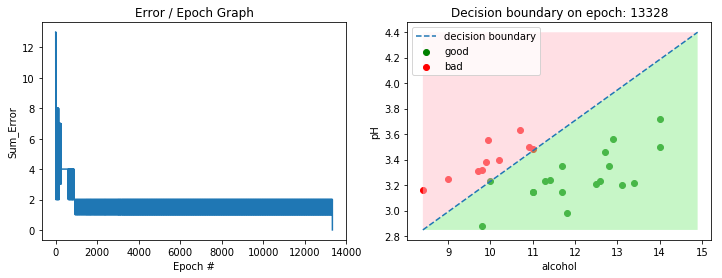

In [80]:
plot_performance(performance, data, 8, 3, -30, save_plot=False)

d) The reason it takes so many epochs to train is because the data is not normalized (or represented between 0 and 1). It takes alot longer for the bias and weights to calibrate for numbers that are larger than one. 


In [81]:
# #Feature Scaling
# #Function for normalizing is ((X - min) / (max - min))

# def normalize_data(data):
    

In [82]:
norm_data = data.copy()
features = [x for x in norm_data.columns]
for feature in features:
    maxim = norm_data[feature].max()
    minim = norm_data[feature].min()
    print(feature, maxim, minim)
    if feature != 'quality':
        norm_data[feature] = norm_data[feature].apply(lambda x: (x - minim) / (maxim - minim))
    
#Double Check if it was normalized
norm_data.describe()

fixed acidity 15.9 4.6
volatile acidity 1.58 0.12
citric acid 1.0 0.0
residual sugar 15.5 0.9
chlorides 0.611 0.012
free sulfur dioxide 72.0 1.0
total sulfur dioxide 289.0 6.0
density 1.00369 0.9900700000000001
pH 4.01 2.74
sulphates 2.0 0.33
alcohol 14.9 8.4
quality 8 3


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,5.636023
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.807569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,5.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,6.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [85]:
norm_train1 = parse_dataframe(norm_data, 8, 3, ['pH', 'alcohol', 'good_bad'])
norm_train1 = dataframe_to_list(norm_train1)

In [86]:
norm_train1

[[0.48031496062992135, 0.676923076923077, 1.0],
 [0.38582677165354323, 0.6461538461538461, 1.0],
 [0.6456692913385828, 0.6923076923076923, 1.0],
 [0.11023622047244074, 0.21538461538461545, 1.0],
 [0.3779527559055119, 0.7692307692307693, 1.0],
 [0.40157480314960625, 0.09230769230769226, 0.0],
 [0.3228346456692912, 0.5076923076923076, 1.0],
 [0.3228346456692912, 0.39999999999999997, 1.0],
 [0.3228346456692912, 0.39999999999999997, 1.0],
 [0.3307086614173229, 0.0, 0.0],
 [0.7716535433070869, 0.8615384615384615, 1.0],
 [0.7007874015748031, 0.3538461538461537, 0.0],
 [0.5669291338582677, 0.6615384615384614, 1.0],
 [0.5039370078740156, 0.23076923076923078, 0.0],
 [0.5826771653543307, 0.39999999999999997, 0.0],
 [0.37007874015748027, 0.6307692307692307, 1.0],
 [0.1889763779527558, 0.5230769230769231, 1.0],
 [0.3622047244094489, 0.723076923076923, 1.0],
 [0.48031496062992135, 0.5076923076923076, 1.0],
 [0.5984251968503937, 0.8615384615384615, 1.0],
 [0.5984251968503937, 0.38461538461538464, 0.

In [87]:
l_rate = 5
n_epoch = 0
performance = train_weights(norm_train1, l_rate, n_epoch)

>epoch=0, lrate=5.000, error=12.000
>epoch=1, lrate=5.000, error=5.000
>epoch=2, lrate=5.000, error=9.000
>epoch=3, lrate=5.000, error=8.000
>epoch=4, lrate=5.000, error=6.000
>epoch=5, lrate=5.000, error=6.000
>epoch=6, lrate=5.000, error=4.000
>epoch=7, lrate=5.000, error=4.000
>epoch=8, lrate=5.000, error=2.000
>epoch=9, lrate=5.000, error=2.000
>epoch=10, lrate=5.000, error=2.000
>epoch=11, lrate=5.000, error=2.000
>epoch=12, lrate=5.000, error=2.000
>epoch=13, lrate=5.000, error=2.000
>epoch=14, lrate=5.000, error=2.000
>epoch=15, lrate=5.000, error=2.000
>epoch=16, lrate=5.000, error=2.000
>epoch=17, lrate=5.000, error=2.000
>epoch=18, lrate=5.000, error=2.000
>epoch=19, lrate=5.000, error=2.000
>epoch=20, lrate=5.000, error=2.000
>epoch=21, lrate=5.000, error=2.000
>epoch=22, lrate=5.000, error=2.000
>epoch=23, lrate=5.000, error=2.000
>epoch=24, lrate=5.000, error=2.000
>epoch=25, lrate=5.000, error=2.000
>epoch=26, lrate=5.000, error=2.000
>epoch=27, lrate=5.000, error=2.000
>

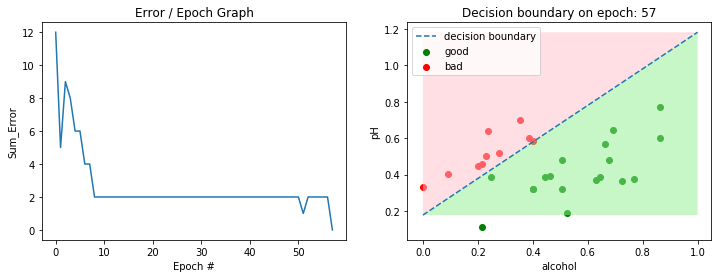

In [88]:
plot_performance(performance, norm_data, 8, 3, -1, save_plot=False)

V.3 My fair ADALINE

a) Results after lowering good threshold to 7 and raising bad threshold to 4
       
       * Look at the graph below and see how interlaced both datasets are. There is no way to make a linear classifier that can differentiate between the two without huge errors
       * Technical term is linearly inseparable problems

In [89]:
norm_train_new_threshold = parse_dataframe(norm_data, good_threshold=7, bad_threshold=4, columns=['pH', 'alcohol', 'good_bad'])
norm_train_new_threshold = dataframe_to_list(norm_train_new_threshold)
print(len(norm_train_new_threshold))

280


In [90]:
performance = train_weights(norm_train_new_threshold, l_rate=.5, n_epoch=150)

>epoch=0, lrate=0.500, error=60.000
>epoch=1, lrate=0.500, error=56.000
>epoch=2, lrate=0.500, error=46.000
>epoch=3, lrate=0.500, error=51.000
>epoch=4, lrate=0.500, error=48.000
>epoch=5, lrate=0.500, error=44.000
>epoch=6, lrate=0.500, error=42.000
>epoch=7, lrate=0.500, error=46.000
>epoch=8, lrate=0.500, error=46.000
>epoch=9, lrate=0.500, error=38.000
>epoch=10, lrate=0.500, error=46.000
>epoch=11, lrate=0.500, error=38.000
>epoch=12, lrate=0.500, error=42.000
>epoch=13, lrate=0.500, error=46.000
>epoch=14, lrate=0.500, error=44.000
>epoch=15, lrate=0.500, error=40.000
>epoch=16, lrate=0.500, error=42.000
>epoch=17, lrate=0.500, error=46.000
>epoch=18, lrate=0.500, error=46.000
>epoch=19, lrate=0.500, error=42.000
>epoch=20, lrate=0.500, error=42.000
>epoch=21, lrate=0.500, error=46.000
>epoch=22, lrate=0.500, error=38.000
>epoch=23, lrate=0.500, error=46.000
>epoch=24, lrate=0.500, error=38.000
>epoch=25, lrate=0.500, error=46.000
>epoch=26, lrate=0.500, error=38.000
>epoch=27, 

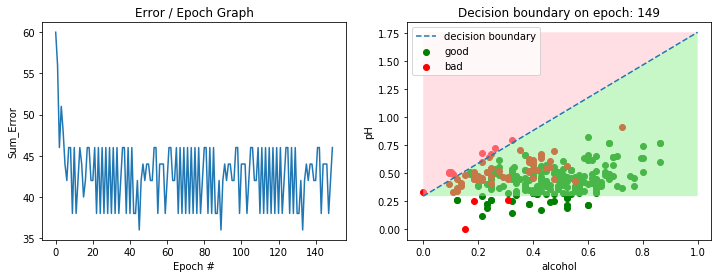

In [91]:
plot_performance(performance, norm_data, good_thresh=7, bad_thresh=4, epoch=-1, save_plot=False)

b) Implement an ADALINE that:

    • Has randomly initialized weights and bias
    • Uses a linear activation function and some kind of quantizer
    • Uses the Widrow-Hoff learning rule

Stochastic Gradient Descent
    
    Gradient Descent is the process of minimizing a function by following the gradients of the cost function.
   
Similarities between perceptron and adaline model:

    * they are both binary classifiers
    * both have a linear decision boundary
    * both can learn iteratively, sample by sample
    * both use a threshold function
    
Difference between perceptron and adaline model
    
    * both are class
    * activation functions returns continuous values or floats between 0 and 1 that are more like probablities
    * These continuous values can be used to learn how close or far this prediction was to the correct value
    

 I WANT TO ACTIVATION TO BE AS CLOSE TO output 1 or 0 and correct itself based off weights
 
 In order to output continuous outputs I need to change prediction function
 

In [95]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        #iterate through inputs and multiply them to corresponding weights
        activation += weights[i + 1] * row[i]
    return activation, 1.0 if activation >= 0.0 else -1.0

In [96]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch, batch=1):
    performance = []
    batch_counter = 0
    error = 0.0
    #random weights
    random.seed(1)
    weights = [random.uniform(0, 1) for i in range(len(train[0]))]
    previous_error = 99999
    sum_error = 0
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            batch_counter += 1
            probability, prediction = predict(row, weights)
            error += row[-1] - probability
            sum_error += abs(row[-1] - prediction)
#             print(row[-1], prediction, sum_error)
            if (batch_counter == batch):
                batch_counter = 0
                weights[0] = weights[0] + l_rate * error
                for i in range(len(row) - 1):
                    weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
                error = 0
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        performance.append((epoch, sum_error, weights[1:], weights[0]))
    if n_epoch <= 0:
        epoch = 0
        while (previous_error >= sum_error):
            if (epoch != 0):
                previous_error = sum_error
            sum_error = 0.0
            for row in train:
                batch_counter += 1
                probability, prediction = predict(row, weights)
                error += row[-1] - probability
                sum_error += abs(row[-1] - prediction)
                if (batch_counter == batch):
                    batch_counter = 0
                    weights[0] = weights[0] + l_rate * error
                    for i in range(len(row) - 1):
                        weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
                error = 0
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))            
            performance.append((epoch, sum_error, weights[1:], weights[0]))
            epoch += 1
            
    print(weights)
    return performance

In [97]:
norm_train3 = parse_dataframe(norm_data, good_threshold=7, bad_threshold=4, columns=['pH', 'alcohol', 'good_bad'], set_range=True)
norm_train3 = dataframe_to_list(norm_train3)

In [98]:
performance = train_weights(norm_train3, l_rate=.006, n_epoch=400, batch=35)

>epoch=0, lrate=0.006, error=126.000
>epoch=1, lrate=0.006, error=124.000
>epoch=2, lrate=0.006, error=124.000
>epoch=3, lrate=0.006, error=124.000
>epoch=4, lrate=0.006, error=124.000
>epoch=5, lrate=0.006, error=124.000
>epoch=6, lrate=0.006, error=124.000
>epoch=7, lrate=0.006, error=124.000
>epoch=8, lrate=0.006, error=126.000
>epoch=9, lrate=0.006, error=124.000
>epoch=10, lrate=0.006, error=124.000
>epoch=11, lrate=0.006, error=128.000
>epoch=12, lrate=0.006, error=128.000
>epoch=13, lrate=0.006, error=126.000
>epoch=14, lrate=0.006, error=122.000
>epoch=15, lrate=0.006, error=122.000
>epoch=16, lrate=0.006, error=120.000
>epoch=17, lrate=0.006, error=116.000
>epoch=18, lrate=0.006, error=112.000
>epoch=19, lrate=0.006, error=108.000
>epoch=20, lrate=0.006, error=106.000
>epoch=21, lrate=0.006, error=106.000
>epoch=22, lrate=0.006, error=106.000
>epoch=23, lrate=0.006, error=104.000
>epoch=24, lrate=0.006, error=106.000
>epoch=25, lrate=0.006, error=106.000
>epoch=26, lrate=0.006

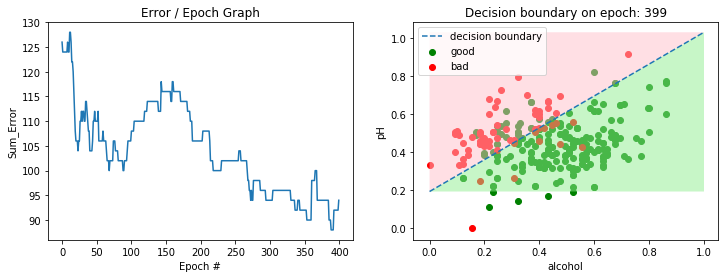

In [99]:
plot_performance(performance, norm_data, good_thresh=7, bad_thresh=4, epoch=-1, save_plot=False)

In [102]:
# bias = performance[-1][3]
# weights = list(performance[-1][2])
# print(bias, weights)

# weights.insert(0, bias)
# print(weights)

# for row in norm_train3:
#     probability, prediction = predict(row, weights)
#     print("Expected=%d, Predicted=%d" % (row[-1], prediction))

d)
    
    batch size = 1, learning rate = .00212, epoch = 1000
        these hyperparameters actually did very well but didn't give me my best results because the batchsize only allows for one single data points to change the weights ,so the line can't pass into the center of the plots and grab more red and blues despite a few single errors
        
    batch size = 15, learning rate = .00212, epoch = 1000
        this did the best it was a good balance of constant learning rate and a solid batch size that allows the line to move into the mass without too much concern for error over each individual input value.
        
    batch size = 35, learning_rate = 0.006, epoch = 1000
        these settings did okay but the decision line began to get lost within the plot and looks like it couldn't converge on a good set of weights because of how large the batches are. lowest error I got was about 90 with these settings.

V.4 Advanced wine sampling and resampling

a) Write a function that uses the holdout method to partition the red wine data into a
training and a validation set. The function should take a parameter to adjust the
proportion of training to validation data. It should return a tuple containing:
(training_pandas_dataframe, validation_pandas_dataframe)

In [ ]:
# california_housing_dataframe = california_housing_dataframe.reindex(
#     np.random.permutation(california_housing_dataframe.index))

def split_train_validation(data,percent_train_data):
    if (percent_train_data >= 1 or percent_train_data <= 0):
        raise Warning("The percentage must be between 0 and 1")
    train_data = data.iloc[0:round(len(data)*percent_train_data), :]
    validation_data = data.iloc[round(len(data)*percent_train_data):, :]
    return(train_data, validation_data)


train_data, validation_data = split_train_validation(norm_data, percent_train_data=0.8)
print(len(train_data), len(validation_data), len(norm_data))

b) Write a function that generates a k-fold cross validation dataset.

In [ ]:
def k_fold_dataset(data, k, randomize=False):
    if (k == 0):
        raise Warning("the k-fold is 0!")
    groups = []
    previous_row = 0
    training_data = pd.DataFrame()
    return_values = []
    
    if (randomize == True):
        data = data.sample(frac=1).reset_index(drop=True)

    #split into k groups
    for i in range(1, k+1):
        index = round(len(data)/k*i)
        groups.append(data.iloc[previous_row: index,:])
        previous_row = index
    for i in range(len(groups)):
        training_data = pd.DataFrame()
        validation_data = groups[i]
        for x in range(len(groups)):
            if x != i:
                training_data = training_data.append(groups[x])
        return_values.append((training_data, validation_data))
    return (return_values)

In [105]:
norm_train4 = parse_dataframe(norm_data, good_threshold=7, bad_threshold=4, columns=['pH', 'alcohol', 'good_bad'], set_range=True)

In [107]:
a = k_fold_dataset(norm_train4, 10, randomize=True)
count = 0
print(len(norm_train4))
for i,x in a:
    count +=1
    print (i, x)

280
           pH   alcohol  good_bad
28   0.409449  0.507692         1
29   0.503937  0.800000         1
30   0.370079  0.630769         1
31   0.503937  0.230769        -1
32   0.551181  0.476923         1
33   0.535433  0.507692         1
34   0.259843  0.307692        -1
35   0.440945  0.523077         1
36   0.322835  0.307692         1
37   0.771654  0.861538         1
38   0.409449  0.430769         1
39   0.362205  0.369231         1
40   0.417323  0.584615         1
41   0.370079  0.369231         1
42   0.330709  0.000000        -1
43   0.322835  0.630769         1
44   0.527559  0.415385        -1
45   0.440945  0.353846         1
46   0.527559  0.538462         1
47   0.551181  0.276923         1
48   0.417323  0.615385         1
49   0.433071  0.384615         1
50   0.488189  0.676923         1
51   0.440945  0.323077         1
52   0.480315  0.153846        -1
53   0.425197  0.446154         1
54   0.519685  0.400000         1
55   0.480315  0.569231         1
56   0.220

c) What effects does changing learning rate and number of training epochs have on the
    ADALINE when evaluated via k-fold cross-validation? To address this question,
    you should write (or modify) a function that will train and assess the ADALINE
    on each training and cross-validation fold produced by your k-fold function.

In [38]:
#evaluate model with different k folds
#So i have to train of training_data then I have to run a percent correct on the test data as an evaluation tool
#Write a function that will train on each training and cross validation fold. Basically a for loop that will go through training data
#I should give both the validation and training to the function and compare the losses for each.

In [182]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights_with_validation(train, validation, l_rate, n_epoch, batch=1):
    performance = []
    batch_counter = 0
    error = 0.0
    #random weights
    random.seed(1)
    weights = [random.uniform(0, 1) for i in range(len(train[0]))]
    
    previous_error = 99999
    sum_train_error = 0
    sum_valid_error = 0
    
    for epoch in range(n_epoch):
        #reset errors for each epoch.
        sum_train_error = 0.0
        sum_valid_error = 0.0

        #Make predictions per row and calculate error to update after each batch
        for row in train:
            batch_counter += 1
            probability, prediction = predict(row, weights)
            error += row[-1] - probability
            sum_train_error += abs(row[-1] - prediction)
            if (batch_counter == batch):
                batch_counter = 0
                weights[0] = weights[0] + l_rate * error
                for i in range(len(row) - 1):
                    weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
                error = 0
                
        #Make predicitons for validation to do evaluation of model
        for row in validation:
            probability, prediction = predict(row, weights)
            sum_valid_error += abs(row[-1] - prediction)
        
        #print performance
#         print('>epoch=%d, lrate=%.3f, train_error=%.3f, valid_error=%.3f' % (epoch, l_rate, sum_train_error/len(train), sum_valid_error/len(validation)))
        performance.append((epoch, sum_train_error, sum_valid_error/len(validation), weights[1:], weights[0]))
    if n_epoch <= 0:
        epoch = 0
        while (previous_error >= sum_train_error):
            #Training continues until the error begins to go back up.
            if (epoch != 0):
                previous_error = sum_train_error
                
            #reset errors for each epoch.
            sum_train_error = 0.0
            sum_valid_error = 0.0
            
            #Make predictions per row and calculate error to update after each batch
            for row in train:
                batch_counter += 1
                probability, prediction = predict(row, weights)
                error += row[-1] - probability
                sum_error += abs(row[-1] - prediction)
                if (batch_counter == batch):
                    batch_counter = 0
                    weights[0] = weights[0] + l_rate * error
                    for i in range(len(row) - 1):
                        weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
                error = 0
            
            #Make predicitons for validation to do evaluation of model
            for row in validation:
                probability, prediction = predict(row, weights)
                sum_valid_error += abs(row[-1] - prediction)
            
#             print('>epoch=%d, lrate=%.3f, train_error=%.3f, valid_error=%.3f' % (epoch, l_rate, sum_train_error/len(train), sum_valid_error/len(validation)))
            performance.append((epoch, sum_train_error, sum_valid_error/len(validation), weights[1:], weights[0]))
            epoch += 1
            
    return performance

In [197]:
count = 0
sum_valid_error = 0.0

for (train, valid) in a:
    print("{}-Fold Cross Validation".format(count))
    train = dataframe_to_list(train)
    valid = dataframe_to_list(valid)
    performance = train_weights_with_validation(train, valid, l_rate=.5, n_epoch=100, batch=1)
    valid_error = performance[-1][2]
    print("Valid Error : {}".format(valid_error))
    sum_valid_error += valid_error
    count += 1
print(sum_valid_error/count)

0-Fold Cross Validation
Valid Error : 0.5714285714285714
1-Fold Cross Validation
Valid Error : 0.35714285714285715
2-Fold Cross Validation
Valid Error : 0.5
3-Fold Cross Validation
Valid Error : 0.5
4-Fold Cross Validation
Valid Error : 0.6428571428571429
5-Fold Cross Validation
Valid Error : 0.35714285714285715
6-Fold Cross Validation
Valid Error : 0.21428571428571427
7-Fold Cross Validation
Valid Error : 0.5
8-Fold Cross Validation
Valid Error : 0.2857142857142857
9-Fold Cross Validation
Valid Error : 0.35714285714285715
0.42857142857142855


c) observations: 

    * Whether the epoch was 10, 100, 1000, 5000, the cross validation error was the same for some reason. Probably beacuse I was testing with a batch size of 1 so it converged in roughly the same place every time. When I increase batch size the epoch makes a larger difference and creates more error if the epoch number is too high.
    
    * When I changed the learning rate to .02 from .2 the validation error dropped down from .3785 to .3071 which is a huge improvement. If I put the learning rate at .5 the validation error goes up to .42857 because it trains too quickly on the dataset and doesn't fine tweak the weights.
    